<a href="https://colab.research.google.com/github/A01721034/Visualizacion-de-datos/blob/main/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
p = "https://raw.githubusercontent.com/A01721034/Visualizacion-de-datos/main/datasets/satis.csv?token=GHSAT0AAAAAAB6XG6LQ2LEHM7AZMWSABT2IY742OAQ"

In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv(p)
df.head()

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,33.0,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,39.0,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,4.0,4.0,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,40.0,Female,Teaching,">40, 000",3.0,4.0,4.0,4.0,3.0,4.0,...,4.0,4.0,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,27.0,Male,Student,"<10,000",5.0,5.0,3.0,4.0,5.0,5.0,...,4.0,4.0,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,23.0,Female,Tutor,"10,000 - 20,000",5.0,5.0,4.0,4.0,5.0,5.0,...,5.0,5.0,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree


In [68]:
#is age group satisfied with price
df.isnull().any()

Age                    True
Gender                 True
Ocupation              True
Monthly income         True
Price                  True
Quality                True
Quantity               True
Availability           True
Taste                  True
Flavours               True
Customer relation      True
Customer services      True
Texture                True
Size                   True
Overal satisfaction    True
Consistency            True
Factor                 True
Frowned                True
reason                 True
Popular                True
My favorite            True
Kind                   True
Preference             True
Recommend              True
dtype: bool

In [69]:
df.isnull().any().sum()

24

In [70]:
df.shape

(55, 24)

In [71]:
df.dropna(how="all", inplace=True)

In [72]:
df.shape

(50, 24)

In [73]:
df.head(2)

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,33.0,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,39.0,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,4.0,4.0,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral


In [74]:
def custom_cls(x):
  if 0<= x <=20:
    return "<= 20"
  if 21<= x <=30:
    return "21 - 30"
  if 31<= x <=40:
    return "31 - 40"
  if 40 <= x:
    return " <= 40"


In [75]:
custom_cls(-5)

In [76]:
df["AgeGP"] = df.apply(lambda tbl:custom_cls(tbl["Age"]),
                                             axis = 1)
df.head()

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,33.0,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31 - 40
1,39.0,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,4.0,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,31 - 40
2,40.0,Female,Teaching,">40, 000",3.0,4.0,4.0,4.0,3.0,4.0,...,4.0,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral,31 - 40
3,27.0,Male,Student,"<10,000",5.0,5.0,3.0,4.0,5.0,5.0,...,4.0,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree,21 - 30
4,23.0,Female,Tutor,"10,000 - 20,000",5.0,5.0,4.0,4.0,5.0,5.0,...,5.0,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree,21 - 30


In [77]:
#group peple from ages 31-40 
countsDf = pd.pivot_table(data=df,
               index ="AgeGP",
               values = "Price",
               aggfunc = "count")
countsDf

,Price
AgeGP,
<= 40,2
21 - 30,30
31 - 40,7
<= 20,11


In [78]:
countsDf = counts.rename({"Price" : "Counts"},
                                  axis = 1)
countsDf

,Counts
AgeGP,
<= 40,2
21 - 30,30
31 - 40,7
<= 20,11


In [79]:
countsDf.columns

Index(['Counts'], dtype='object')

In [82]:
countsDf.reset_index(inplace = True)

In [90]:
t = countsDf.loc[:,"Counts"].sum()
t

50

In [92]:
countsDf["%"] = (countsDf.loc[:, "Counts"]/ t)*100
countsDf

,AgeGP,Counts,%
0,<= 40,2,4.0
1,21 - 30,30,60.0
2,31 - 40,7,14.0
3,<= 20,11,22.0


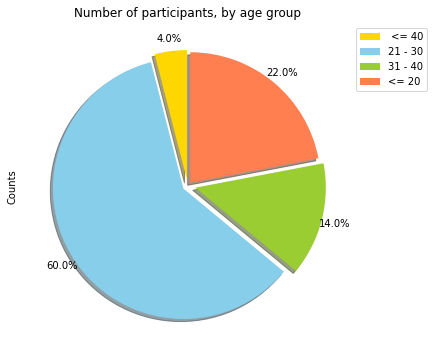

In [103]:
import matplotlib as npl
import matplotlib.pyplot as plt

cols = ["gold", "skyblue", "yellowgreen", "coral", "pink"]
explode_dis = [0.04, 0.04, 0.06, 0.03]
countsDf["Counts"].plot(kind = "pie",
                       figsize = (15,6),
                       startangle = 90,
                        labels = None,
                        autopct = "%1.1f%%",
                        pctdistance = 1.1,
                        colors = cols,
                        explode = explode_dis,
                        shadow = True)

plt.title("Number of participants, by age group")
plt.legend(labels = countsDf.AgeGP,
           bbox_to_anchor = (1,1))

In [104]:
import plotly 
import plotly.express as px

In [108]:
c = pd.pivot_table ( data = df,
                    index = ["AgeGP", "Gender"],
                    aggfunc = "count",
                    values = "Price")
c = c.rename({"Price" : "Counts"},
             axis = 1)
c = c.reset_index()
c

,AgeGP,Gender,Counts
0,<= 40,Female,1
1,<= 40,Male,1
2,21 - 30,Female,11
3,21 - 30,Male,19
4,31 - 40,Female,5
5,31 - 40,Male,2
6,<= 20,Female,5
7,<= 20,Male,6


In [110]:
fig = px.sunburst(c,
                  path = [ "AgeGP", "Gender"],
                  values = "Counts")
fig.show()